The Goal of this analysis is to work with the linear regression algorithm,
its advantages and its limitations and also make you more comfortable in using python, and the primary packages
that are used for data analysis and machine learning.

In [1]:
# imports
import sklearn
from pandas import DataFrame
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

print(f"sklearn version: {sklearn.__version__}")

sklearn version: 0.24.1


Diabetes is a group of metabolic disorders characterized by a high blood sugar level over a prolonged period of time and its effects on the world population are severe. Diabetes doubles a person's risk of early death, and it is the 7th leading cause of death in the world today.

In this exercise we are going to try to make the world a little brighter by attempting to predict the progression of diabetes using a person vitals and physical information.

For more information about our dataset you can look [here](https://github.com/scikit-learn/scikit-learn/blob/0fb307bf39bbdacd6ed713c00724f8f871d60370/sklearn/datasets/descr/diabetes.rst).

Let us start by loading the sklearn diabetes dataset:

In [2]:
# loading built in dataset
diabetes_dataset = load_diabetes(as_frame=True)

# renaming columns for more informative names
feature_map = {'age': 'Age', 'sex': 'Sex', 'bmi': 'Body mass index',
               'bp': "Average Blood Pressure", 's1': 'T-Cells',
               's2': 'Low-Density Lipoproteins',
               's3': 'High-Density Lipoproteins',
               's4': 'Thyroid Stimulating Hormone', 's5': 'lamotrigine', 
               's6': 'Blood Sugar Level', 
               'target': 'Disease Progression Measure'}

data: DataFrame = diabetes_dataset['data'].rename(columns=feature_map)
data['Sex'] = data['Sex'].apply(lambda x: 'Male' if x > 0 else 'Female')
data['disease progress'] = diabetes_dataset['target']

## Feature Scaling

Before we can continue and use the data to build our linear regression module we must first ensure
that all our data and target features are normalized.
More specifically we use a type of normalization known as "standardization" that subtracts
from each feature its mean and divides it by its standard deviation.

This is done so all our features have more or less the same numerical scale because most of
the training optimization algorithms we use generally don't work well when features have
different scale, this happens because when features have different scale they
affect the gradiant of our cost function in different magnitudes and this could lead to a slow
or ineffective optimization process or in case of an unscaled target feature it could lead
to very high gradients or very low ones.

In this example sklearn already pre-processed the dataset for us.


# Part 1: Visualization and  Exploratory Data Analysis (20 points)

Before we start fitting our linear regression module, we would like to first explore our data and choose the most relevant features, in order to do this we will use packages called `matplotlib` and `seaborn` for visualizing the relationship between our features, and our target feature.

We will use the matplotlib scatter plot function and subplot function to create a grid of scatter plots that will help us to see if any of our features (X) have a linear connection to the disease progress (y). We will Loop over all features and plot every feature vs the disease progress using a separate plot and Use labels on axes and the plots.

Use the following documentation for reference : [Scatter Plots](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html), [Subplots](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html), [Title](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html), Labels ([x](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html),[y](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylabel.html)).

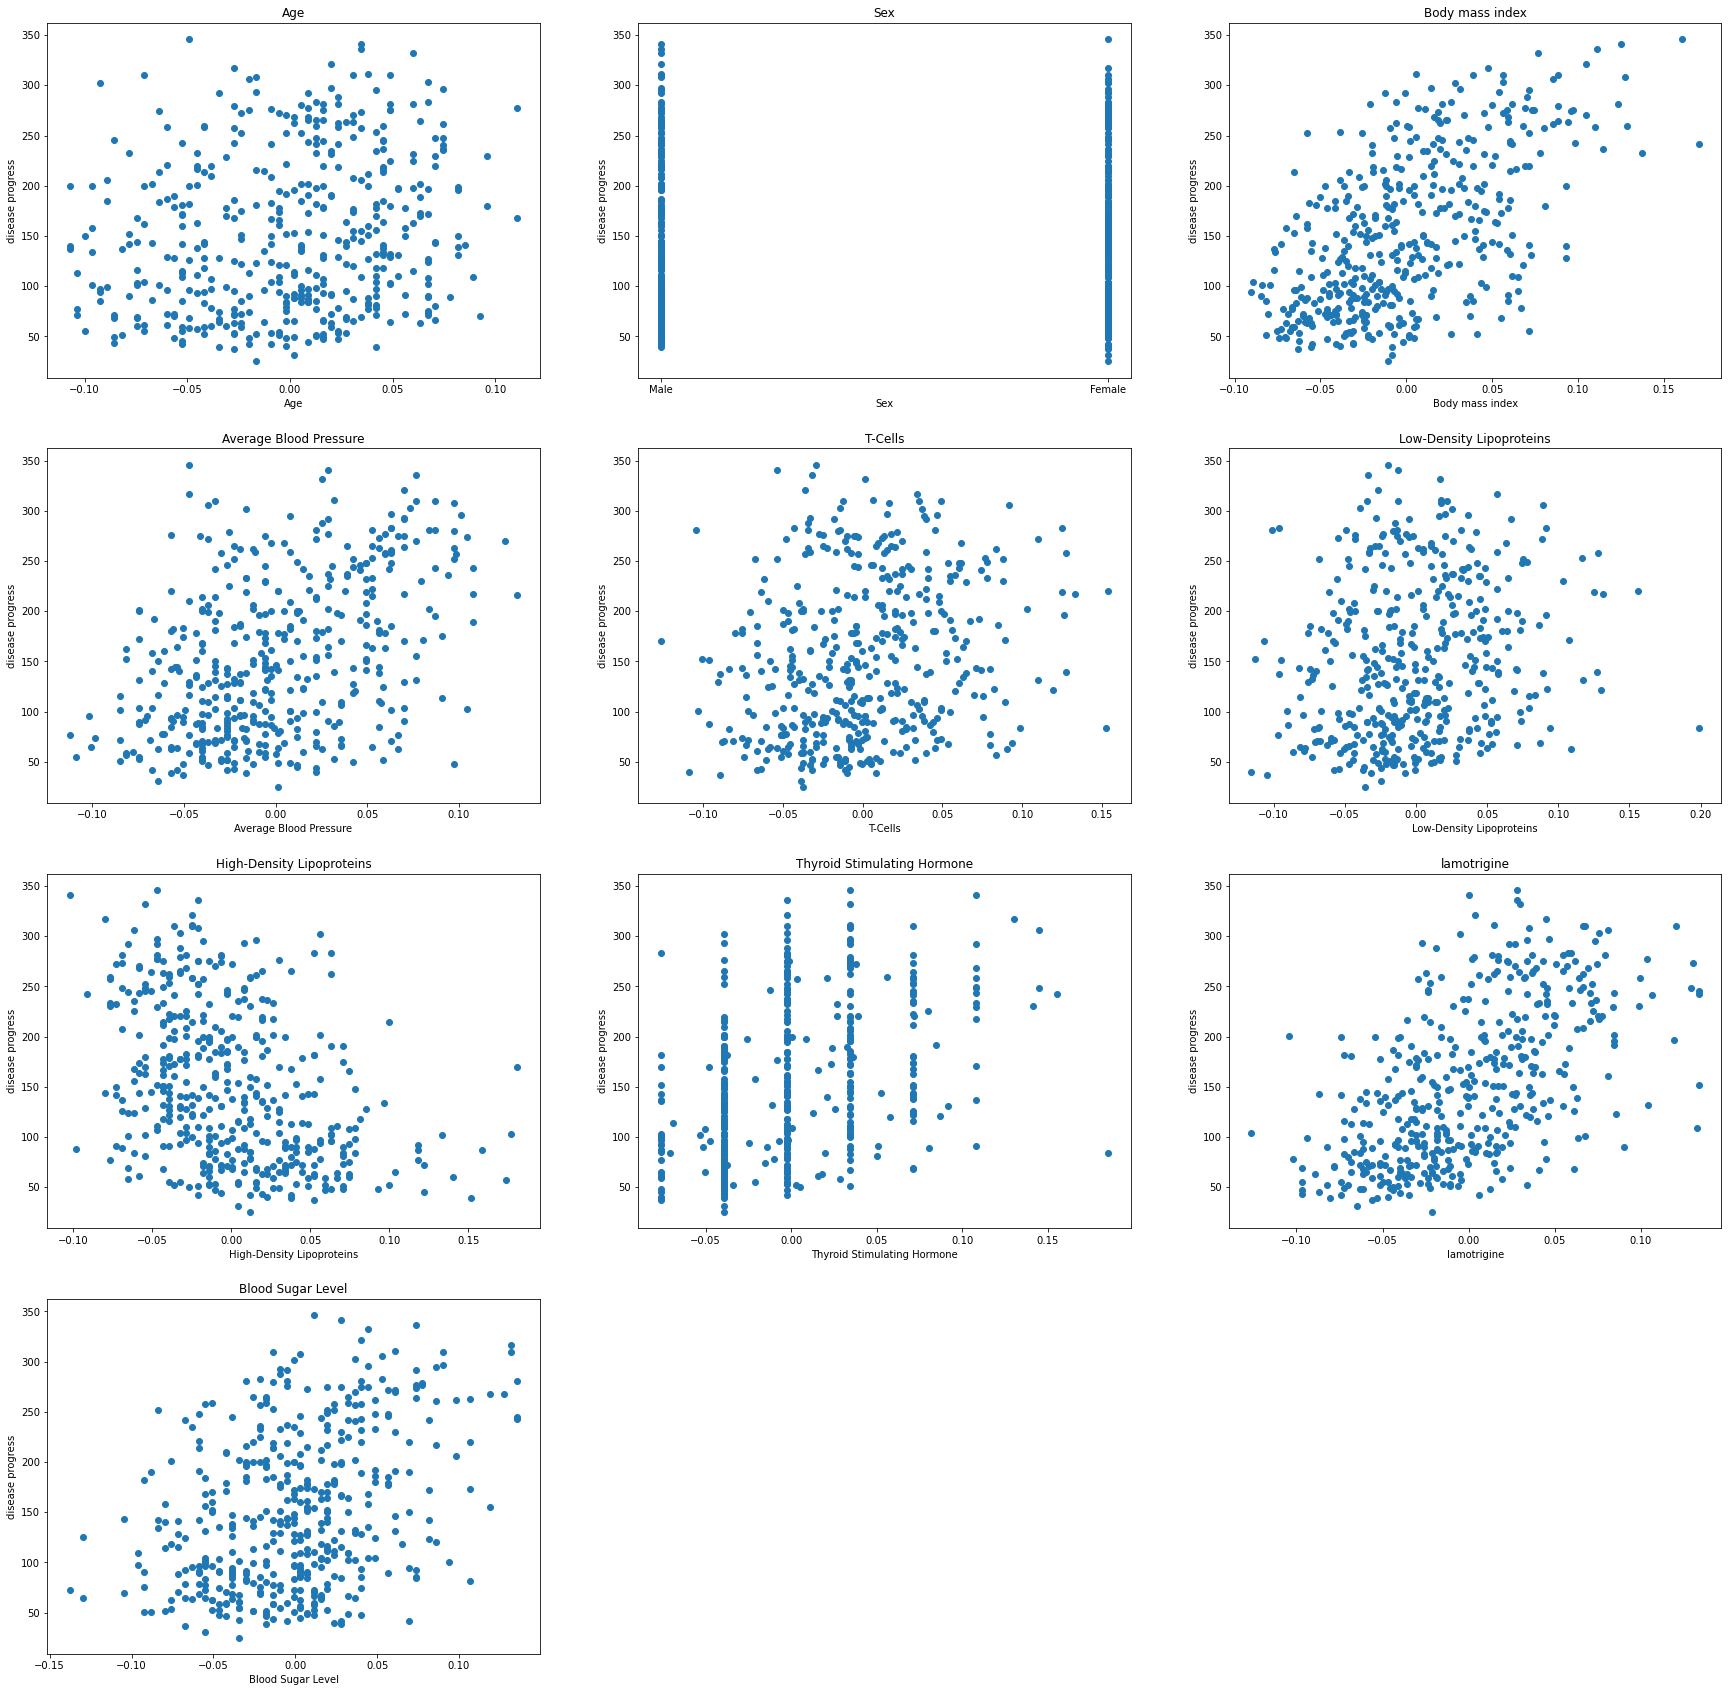

In [3]:
# setting up a canvas
fig = plt.gcf()
fig.set_size_inches(30, 30)

# getting a feature list
features = data.drop('disease progress', axis=1).columns
target_feature = data['disease progress']

for i, col in enumerate(features):
    plt.subplot(4, 3 , i + 1)
    plt.scatter(data[col], target_feature, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('disease progress')

plt.show()

#### **A:** Choose any 3 features. For each one, explain what did you learn from that feature on the progression of diabetes. Additionally, is being male of female relevant to diabetes disease progress? What can you learn from the graphs and from the `describe` function on both populations? (20 points)

**Your answer here**

1. Age - since the points are scattered with no specific correlation nor any specific pattern we can say that6 there is not a strong impact of age to the disease progress, thus no correlation. <br><br>

2. Body Mass Index - notice that there is a positive coefficient of correlation as the higher the body mass index gets the higher the disease progress is.<br><br>

3. High Density Lipoproteins - Notice that negative correlation is occuring as the value of High Density Lipoproteins increases the value of disease progress decreases.<br>

Description: 
From the graphs above observe that the data points for men reached a higher volume and value for the disease progress than women do, however the difference is not that huge(minimum), however if studied further we can notice that the mean and std are different. 


# Part 2: Learning a Linear Model (60 points)

## Data Splitting & Cleaning

We first drop the sex column from the dataset since it is not numerical. We will learn about dealing with such features in future lectures.

Here we will split our data to two sets. A training set that we will use for model training, and a test set that we will use for evaluation. This is done because we want to ensure that our model has good generalization capabilities and works well on instances that we didn't train it on, so we hold back a small part (usually 20%) of the dataset that will be used to test our model's generalization capability.

In [4]:
data = data.drop('Sex', axis=1)

X_train, X_test, y_train, y_test = train_test_split(data.drop('disease progress', axis=1), 
                                                    data['disease progress'],
                                                    test_size=0.2, random_state=42)

#### A: Fit 3 different linear regression models using `sklearn`. Check out the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

1. A Linear regression model with a single feature (choose the best feature according to your analysis from *Part 1*).
2. A Linear regression model with 5 features (choose the top features according to your analysis from *Part 1*).
3. A Linear regression model with all the features.

When choosing features for the first 2 models use the scatter plots and density plots to determine which feature are more likely to be correlated with the disease progress of diabetes. (10 points)

In [5]:
### hint -> write your features in the best_feature list and five five_best_features list and use them to extract the relevant features from the pandas dataframe and use them in training the models

single_feature_model = None
five_features_model = None
all_features_model = None

##### your code starts here #####
best_feature = []
five_best_features = []

best_feature = ['Body mass index']
five_best_features =['Body mass index','High-Density Lipoproteins','Blood Sugar Level','lamotrigine','Average Blood Pressure']
single_feature_model = LinearRegression().fit(X_train[best_feature], y_train)
five_features_model = LinearRegression().fit(X_train[five_best_features], y_train)
all_features_model = LinearRegression().fit(X_train, y_train)

##### your code ends here #####

In [6]:
print(best_feature, single_feature_model)

single_feature_model.score(X_train[best_feature], y_train)

print(five_best_features, five_features_model)

five_features_model.score(X_train[five_best_features], y_train)

['Body mass index'] LinearRegression()
['Body mass index', 'High-Density Lipoproteins', 'Blood Sugar Level', 'lamotrigine', 'Average Blood Pressure'] LinearRegression()


0.4983256813873781

#### **B:** Evaluate your linear regression models using the [mean squared error cost function](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html). During evaluation, use both the training set (X_train and y_train) and the test set (X_test and y_test). Explain the difference between the test and train costs, and the different between the different models. (10 points)

In [7]:
### hint -> assign your models to the following variables and use the following loop to calculate and print your features
### name is the model name, regression_model is the model and data train\test is the indexed train\test data
single_feature_model = single_feature_model
five_features_model = five_features_model
all_features_model = all_features_model

for name, regression_model, data_train, data_test in [('Single Feature', single_feature_model, X_train[best_feature], X_test[best_feature]),
                                                    ('Five Features', five_features_model, X_train[five_best_features], X_test[five_best_features]),
                                                    ('All Features', all_features_model, X_train, X_test)]:
##### your code starts here #####
     print(name , mean_squared_error(y_test, regression_model.predict(data_test)))

print("From the test we can determine that the single feature is not accuracte and the 5 model is better to evauate.")
##### your code ends here #####

Single Feature 4061.825928494928
Five Features 2926.821201832262
All Features 2986.72122533126
From the test we can determine that the single feature is not accuracte and the 5 model is better to evauate.


#### **C:** Train a single variable linear regression model using for all numerical features. Which feature yields the best results in terms of the cost function on the testing dataset? Did you guess correctly what the best feature will be? (10 points)

In [23]:
### hint -> use the following loop, feature represents a single feature in each iteration
min_feature_val = 10000
for feature in data.columns[:-1]:
##### your code starts here #####
    test = LinearRegression().fit(X_train[[feature]], y_train)
    print(feature , mean_squared_error(y_test, test.predict(X_test[[feature]])))
    
    if (min_feature_val > mean_squared_error(y_test, test.predict(X_test[[feature]]))):
        min_feature_val = mean_squared_error(y_test, test.predict(X_test[[feature]]))
        minimum_feature_val = feature
    
print(minimum_feature_val, min_feature_val)    
##### your code ends here #####

Age 5254.231976236004
Body mass index 4061.825928494928
Average Blood Pressure 4379.41324531986
T-Cells 5003.743697611197
Low-Density Lipoproteins 5060.010768986381
High-Density Lipoproteins 4317.345872786977
Thyroid Stimulating Hormone 4256.214645141061
lamotrigine 3270.5689613353848
Blood Sugar Level 4715.1604506113135
lamotrigine 3270.5689613353848


##### **Your answer here**<br>
Notice that lamotrigine has the minimum value after performing the mean_squared_error and the single linear regression test, which means its the best feature which was our second guess after the body mass index, however when comparing the worst feature which has the maximum value, notice it was the age which was guessed right according to our previous analysis.

#### **D:** Interpreting linear regression models can be performed by comparing the coefficients for each feature. Given the coefficients for the linear regression model that was trained using all the features, explain what is the different between a positive and negative coefficients. What is the significance of one feature having a larger coefficient than the other? (10 points)

In [9]:
for feature_name, coeff in zip(data.columns[:-1], all_features_model.coef_):
    print("Feature: {}  Coefficient: {:.2f}".format(feature_name, coeff))

Feature: Age  Coefficient: 3.49
Feature: Body mass index  Coefficient: 590.24
Feature: Average Blood Pressure  Coefficient: 304.22
Feature: T-Cells  Coefficient: -884.55
Feature: Low-Density Lipoproteins  Coefficient: 510.30
Feature: High-Density Lipoproteins  Coefficient: 194.68
Feature: Thyroid Stimulating Hormone  Coefficient: 183.39
Feature: lamotrigine  Coefficient: 762.79
Feature: Blood Sugar Level  Coefficient: 38.06


**Your answer here**<br>


There are 2 different cases, first, if the correlation coefficient is positive then the features are moving towards the same direction, second, if the correlation coefficient is negative then they move towards opposite directions. 
<br>
It depends on the correlation coefficient value, positive or negative coefficient the closer the value is to 0 the worse the relationship between them, as the effect on one of other will be less


# Part 3: Linear Regression with L1 Regularization (Lasso) (20 points)

#### A: In the basic linear regression model with do not put any limit on the weights that the model learns. In order to avoid overfitting, we can add the following term that will force all the weights to be small:

#### $$Cost = MSE + \alpha * \sum_{i}^{n} ||\theta_i||_1$$

#### Where alpha is a hyper parameter controlling how dominant the Lasso term is.

#### Instead of guessing a proper value for alpha, we will perform a grid search on a range of values. For every alpha value, train a [Lasso model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) using the training dataset and evaluate it using MSE on the training and testing datasets. Save the training and testing cost results in the given dedicated arrays and use the next cell to visualize your results. Which alpha performs best? What can you say about the behavior of the train and test MSE values as a function of alpha? (10 points)

In [10]:
alphas = [i / 100 for i in range(1, 100, 5)]
MSE_train = []
MSE_test = []

### hint -> use the following loop, it will iterate over all the relevant alpha values, in each iteration use "append" to add the relevant score to either MSE_train or MSE_test as needed
for alpha in alphas:
##### your code starts here #####

#we initiate our classifier

    classifier = Lasso(alpha=alpha)
    classifier.fit(X_train, y_train) #Fit model with coordinate descent.
    
    y_predict_train = classifier.predict(X_train)
    y_predict_test = classifier.predict(X_test) 

    MSE_train.append(mean_squared_error(y_predict_train, y_train))
    MSE_test.append(mean_squared_error(y_predict_test, y_test))


##### your code ends here #####

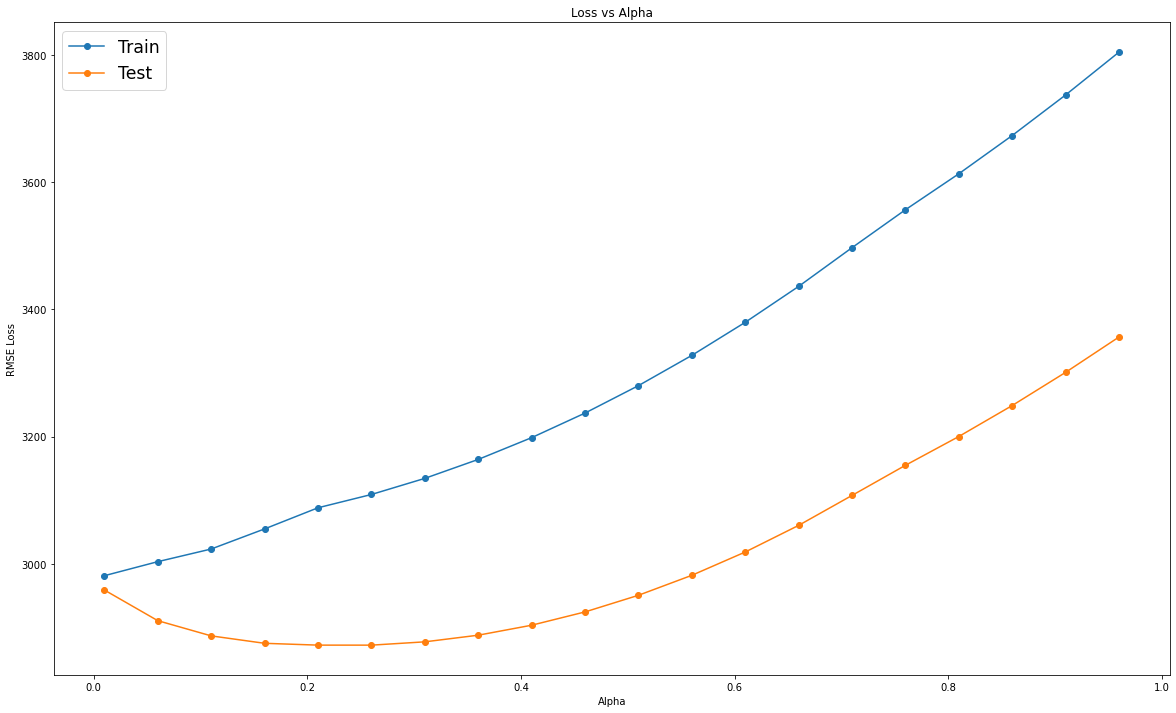

In [11]:
fig, ax = plt.subplots(1, figsize=(20,12))
ax.plot(alphas, MSE_train, marker='o', label='Train')
ax.plot(alphas, MSE_test, marker='o', label='Test')

ax.set_xlabel("Alpha")
ax.set_ylabel('RMSE Loss')
ax.title.set_text("Loss vs Alpha")
ax.legend(fontsize='xx-large')
plt.show()

**Your answer here**<br>
We check for the cost with minimum value on the test values, and from the graph above we can observe that the alpha is approximately between the values 0.2 - 0.3, thus the alpha with the smallest value will give us the best performance. <br>

What can you say about the behavior of the train and test MSE values as a function of alpha?<br>
The larger our alpha is the larger the MSE loss is.

